In [9]:
clear;
clc;
close all;
pkg load image;
graphics_toolkit("gnuplot");




In [10]:
set(gcf,'Visible','on');

Inline plot failed, consider trying another graphics toolkit
error: print: no axes object in figure to print
error: called from
    _make_figures>safe_print at line 125 column 7
    _make_figures at line 49 column 13



In [11]:

I_color = imread("Caras/Database/10_1.png");
A = I_color(:,:,1);

A =im2double(A);
val_sing=diag(A);
[m,n]=size(A)

m = 112
n = 92


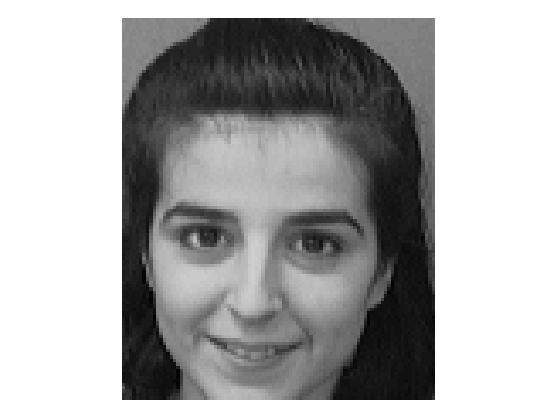

In [12]:
imshow(A);


In [13]:
rank(A)
size(A)

ans = 92
ans =

   112    92



In [14]:
function img_list = load_images_from_directory (filepath)
    img_list = [];
    files = glob(filepath);
    for i=1:numel(files)
      name = files{i};
      img_matrix = im2double(imread(name));
      img_columnvector=img_matrix(:);
      img_list = horzcat(img_list, img_columnvector);
    endfor
endfunction

In [123]:
img_list = load_images_from_directory('Caras/Database/*.png');

In [124]:
function prom_face = calc_prom_face (img_list)
[cols N] = size(img_list);
prom_face = zeros(1,cols);
for i=1:cols
    prom_face(i) = sum(img_list(i,:))/N;
endfor
endfunction

In [125]:
size(img_list)

ans =

   10304     360



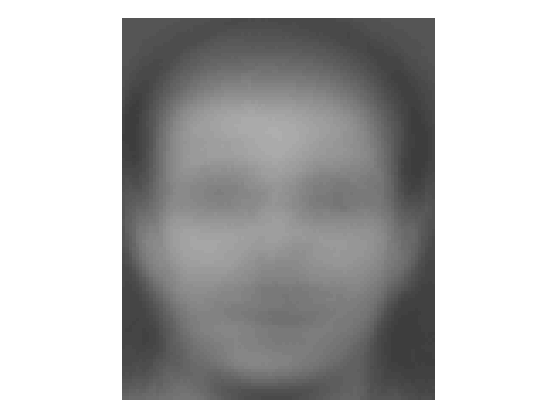

In [126]:
prom_face=calc_prom_face (img_list);

imshow(reshape(prom_face,112,92))

In [127]:
diff_matrix=[];
img_list_T=img_list';
[cols N] = size(img_list);
for i=1:N
    diff_matrix = vertcat(diff_matrix, minus(img_list_T(i,:),prom_face ));
endfor
diff_matrix=diff_matrix';

In [128]:
size(prom_face)
size(img_list_T(5,:))
size(diff_matrix)

ans =

       1   10304

ans =

       1   10304

ans =

   10304     360



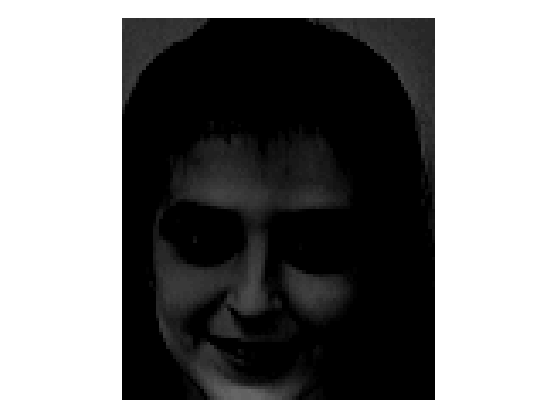

In [129]:
imshow(reshape(diff_matrix(:,1),112,92))

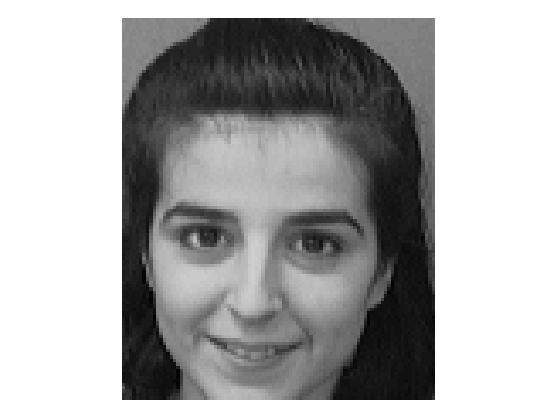

In [130]:
imshow(reshape(img_list(:,1),112,92))

In [131]:
[U,S,V] =svd(diff_matrix);

In [132]:
r_diff= rank(diff_matrix);
Ur=U(:,1:r_diff);
size(Ur)

ans =

   10304     359



In [133]:
diff_matrix_T=diff_matrix';
[cols N] = size(diff_matrix);
X=[];
for i=1:N
    X = vertcat(X, (Ur'*diff_matrix_T(i,:)')');
endfor
X=X';
size(X)

ans =

   359   360



In [139]:
new_face =im2double(imread("Caras/Comparar/12_10.png"))(:);

In [140]:
W=Ur'*minus(new_face,prom_face');
size(W)

ans =

   359     1



In [141]:
norm_W_X = [];
for i=1:N
    norm_W_X = [norm_W_X; norm(W-X(:,i))'];
endfor
size(norm_W_X)
[minval, idx] = min(norm_W_X)

ans =

   360     1

minval = 7.3097
idx = 27


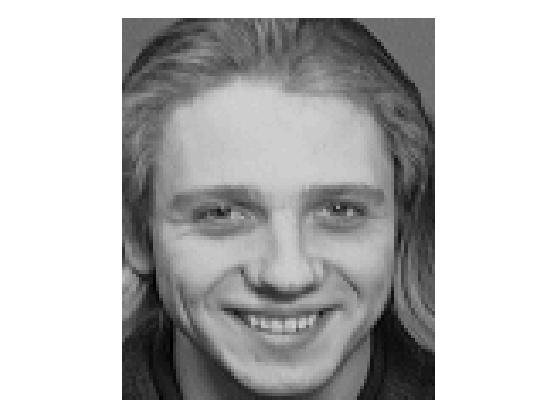

In [144]:
imshow(reshape(new_face,112,92))

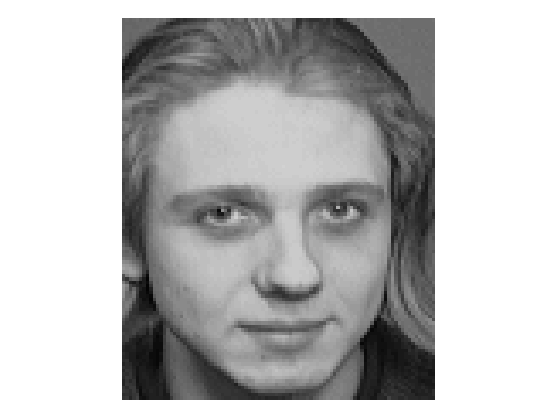

In [143]:
imshow(reshape(img_list(:,idx),112,92))

In [29]:
size(X)
size(W)
size(Ur')
size(diff_matrix_T)

ans =

   40   39

ans =

      39   10304

ans =

      39   10304

ans =

      40   10304



In [107]:
A = [12 62 93 -8 ; 1 2 3 4]
A(:,1)
size(A(:,1))
A(1,:)

A =

   12   62   93   -8
    1    2    3    4

ans =

   12
    1

ans =

   2   1

ans =

   12   62   93   -8



In [108]:
A-A(1,:)

ans =

    0    0    0    0
  -11  -60  -90   12



In [26]:
minus(A,A)

ans =

   0   0   0   0
   0   0   0   0



In [3]:
M = 1000;
N = 1000;
n = rand(N,2);
m = rand(M,2);
eN = ones(N,2);
eM = ones(2,M);

tic;
d_vect  = sqrt(eN*m.^2' - 2*n*m' + n.^2*eM);
vect_time = toc;

tic;
for i=1:N
  for j=1:M
     d_for(i,j) = norm(n(i,:)-m(j,:));
  end
end
for_time = toc; 



In [4]:
assert(norm(d_vect-d_for) < 1e-10*norm(d_for)) 
vect_time
for_time

vect_time = 0.038272
for_time = 12.026
